# Esercitazione 3

### Exercise 03.1 <span style="color:red"> Plain vanilla option pricing </span>

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

Black-Scholes <span style="color:blue"> analytic solution </span> for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:

1. <span style="color:red"> By sampling **directly** the final asset price $S(T)$</span> for a $GBM(r,\sigma^2)$
2. <span style="color:red"> By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price</span> 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

## Black-Scholes analytic solution:

In [1]:
import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


Il calcolo numerico è stato implementato in un codice C++, con il metodo della media a blocchi. <br>
In particolare il codice è strutturato in modo da avere una classe Options() in cui vengono tenuti tutti i parametri delle opzioni; $S(T)$ viene calcolato con una semplice media più volte, sia direttamente sia discretizzando $t$, in modo che la classe abbia come data membri quattro vettori contenenti ciascuno un grande numero di valori del prezzo delle opzioni richieste. La media a blocchi di tali vettori viene eseguita utilizzando una seconda classe apposita. Vengono infine prodotti quattro file di dati contenenti la media a blocchi progressiva delle quantità richieste. <br>
Di seguito i grafici dell'opzione Call e Put calcolato usando direttamente $S(T)$ e utilizzando step intermedi.

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

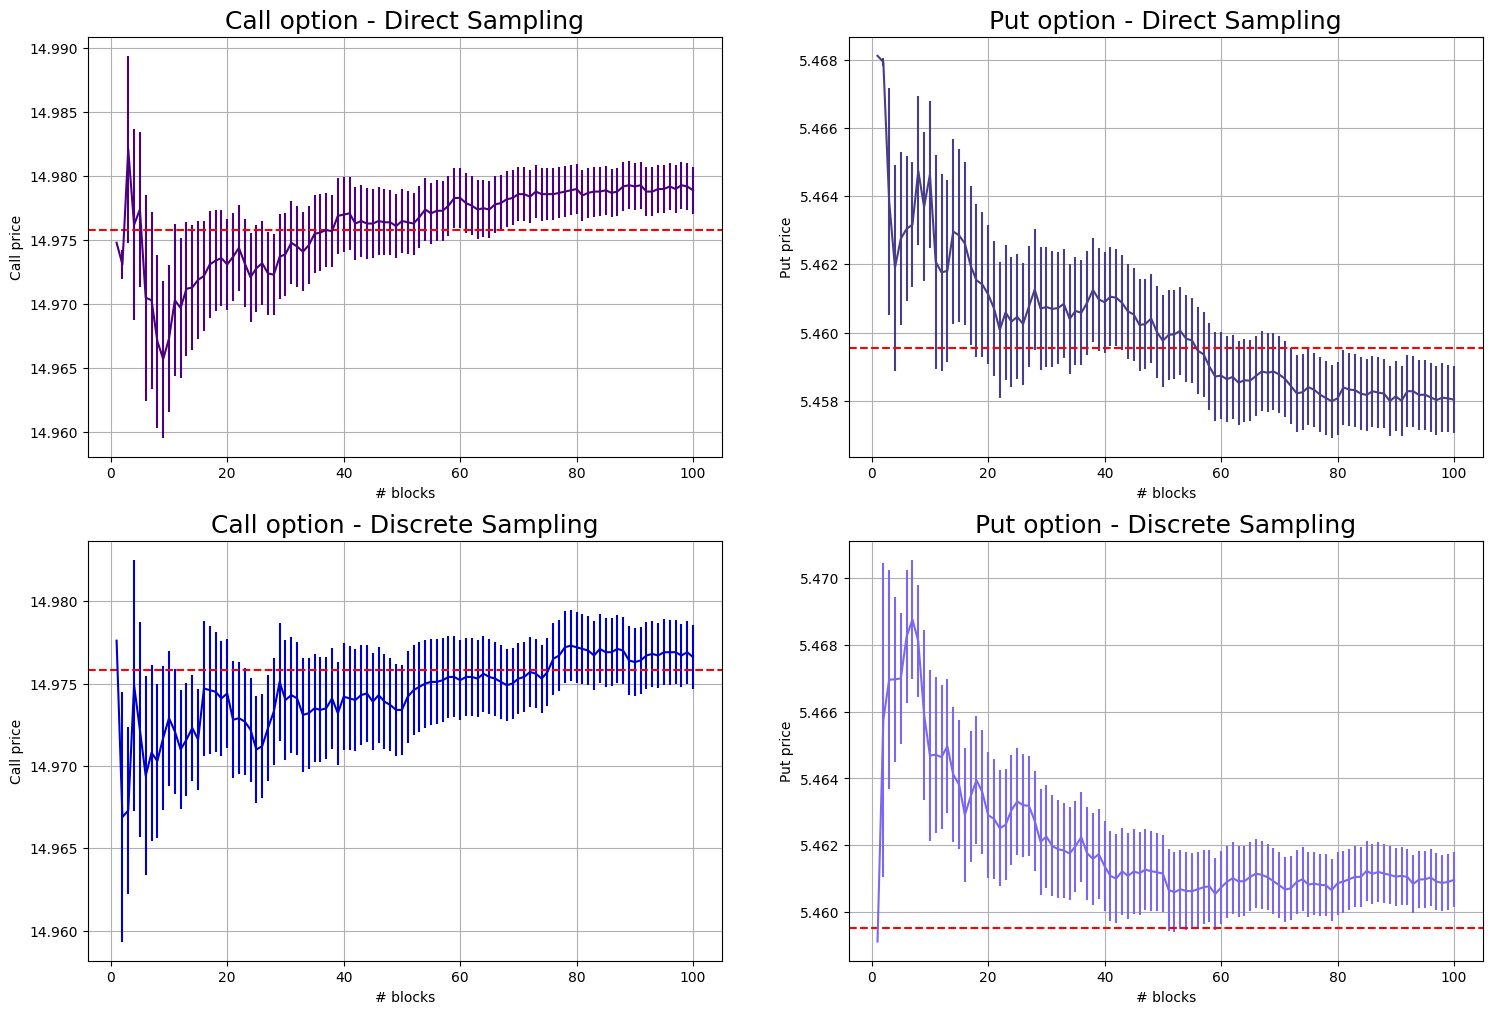

In [3]:
name = ["output_CallDirect.dat", "output_PutDirect.dat", "output_CallDiscrete.dat", "output_PutDiscrete.dat"]
title = ["Call option - Direct Sampling", "Put option - Direct Sampling", "Call option - Discrete Sampling", "Put option - Discrete Sampling"]
y_label = ["Call price", "Put price", "Call price", "Put price"]
colors = ["indigo", "Darkslateblue", "mediumblue", "mediumslateblue"]
correct_values = [call, put, call, put] 

fig, axes  = plt.subplots(2,2, figsize=(18,12))

for i in range(4): 
    ax = axes[i // 2, i % 2]
    data = np.loadtxt( name[i] )
    ax.errorbar(data[:,0], data[:,2], yerr = data[:,3], color=colors[i]) 
    ax.axhline(y=correct_values[i], color='r', linestyle='--') # value for Call price
    ax.set_title(title[i], fontsize=18)
    ax.set_xlabel("# blocks")
    ax.set_ylabel(y_label[i])
    ax.grid(True)
    
plt.show()

Tutte le quantità calcolate differiscono dalla soluzione esatta per meno di 1.5 volte l'errore sull'ultimo dato. Tutte sono inoltre soggette a fluttuazioni evidenti, non tendono verso il valore esatto in modo regolare. Questo è dovuto al fatto che il metodo usato per il calcolo di $S(T)$ è intrinsecamente randomico e tende al valore vero per un numero molto elevato di dati.